# Model Evaluation in Machine Learning

**Objective:**  
In this notebook, we will learn how to **evaluate the performance of machine learning models** using various metrics for **classification and regression tasks**.  
We will cover:  
- Train/Test Split & Cross-Validation  
- Evaluation metrics for Regression  
- Evaluation metrics for Classification  
- Confusion Matrix, ROC & AUC  
- Hyperparameter tuning impact on model performance


## Dataset Overview

We will use the **Titanic dataset** for classification (survival prediction) and the **Boston Housing dataset** for regression (house price prediction).

**Titanic Dataset Features:**  
- PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked  
- Target: `Survived` (0 = Not Survived, 1 = Survived)

**Boston Housing Dataset Features:**  
- CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT  
- Target: `MEDV` (Median house value)


In [4]:
# General Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report

# Models
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

## Train/Test Split

Before evaluating a model, we need to **split the data into training and testing sets**.  
- Training set: Used to train the model  
- Test set: Used to evaluate model performance on unseen data  

We use `train_test_split` from scikit-learn.


In [5]:
# Load Titanic Dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# Basic preprocessing
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
titanic['Embarked'].fillna('S', inplace=True)
titanic['Sex'] = LabelEncoder().fit_transform(titanic['Sex'])
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)

# Features and target
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = titanic['Survived']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (712, 8)
Test set size: (179, 8)


## Classification Model: Logistic Regression & Random Forest

We will train two classifiers:
1. Logistic Regression  
2. Random Forest Classifier  

Then we will evaluate their performance using **accuracy, precision, recall, F1-score, and ROC-AUC**.


In [6]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))


Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888


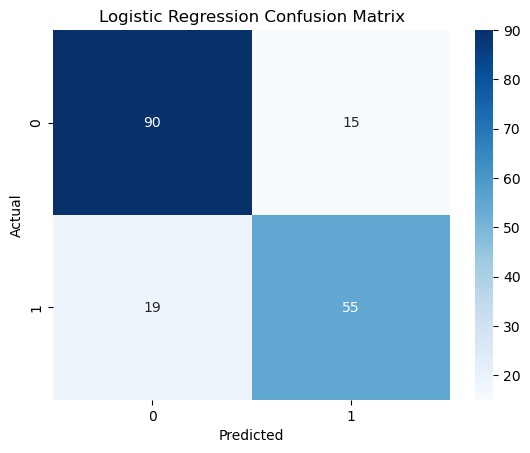

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_log))


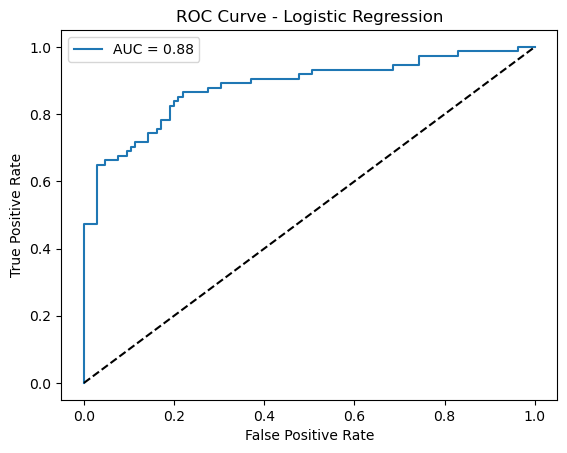

In [8]:
# ROC Curve
y_prob_log = log_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_log)
auc_score = roc_auc_score(y_test, y_prob_log)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


## Regression Model: Linear Regression & Random Forest Regressor

We will use the **Boston Housing dataset** to predict house prices (`MEDV`).  
Evaluation metrics include:  
- Mean Squared Error (MSE)  
- Root Mean Squared Error (RMSE)  
- Mean Absolute Error (MAE)  
- R² Score


In [10]:
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing(as_frame=True)
X_b = housing.data
y_b = housing.target

# Train/Test split
from sklearn.model_selection import train_test_split
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42)

print("Features shape:", X_train_b.shape)
print("Target shape:", y_train_b.shape)


Features shape: (16512, 8)
Target shape: (16512,)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train model
lin_model = LinearRegression()
lin_model.fit(X_train_b, y_train_b)

# Predictions
y_pred_lin = lin_model.predict(X_test_b)

# Evaluation
mse = mean_squared_error(y_test_b, y_pred_lin)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_b, y_pred_lin)
r2 = r2_score(y_test_b, y_pred_lin)

print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2 Score: {r2:.2f}")


MSE: 0.56, RMSE: 0.75, MAE: 0.53, R2 Score: 0.58


In [12]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_b, y_train_b)

y_pred_rf = rf_model.predict(X_test_b)

# Evaluation
mse_rf = mean_squared_error(y_test_b, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_b, y_pred_rf)
r2_rf = r2_score(y_test_b, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R2 Score: {r2_rf:.2f}")


Random Forest - MSE: 0.26, RMSE: 0.51, MAE: 0.33, R2 Score: 0.81


## Cross-Validation & Hyperparameter Tuning

- Cross-validation helps **evaluate model stability** on different subsets of data  
- Hyperparameter tuning (GridSearchCV) helps find **optimal model parameters**

We will demonstrate using Random Forest Classifier on Titanic dataset.


In [13]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Evaluate on test set
y_pred_grid = grid.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_grid))


Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.8314094356347876
Test Accuracy: 0.8156424581005587


# Summary

In this notebook, we have learned how to:

- Split datasets into training and testing sets
- Train classification and regression models
- Evaluate classification models using **Accuracy, Precision, Recall, F1, Confusion Matrix, ROC-AUC**
- Evaluate regression models using **MSE, RMSE, MAE, R² Score**
- Apply **cross-validation and hyperparameter tuning** to improve model performance

These concepts are **essential for real-world ML pipelines**, as robust evaluation ensures models perform reliably on unseen data.
